# Workbook Information:

*  This notebook creates a binary classification dataset using Scikit-Learn's `make_moons()` function, visualises it and builds a simple Neural Network model to classify between classes



# Importing libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the helper_functions file
import os

if not os.path.exists('helper_functions.py'):
  !wget https://raw.githubusercontent.com/DavAll22/Extra-Code/main/helper_functions_TF.py
else:
  print("[INFO] 'helper_functions_TF.py' already exists, skipping download.")

# Making the dataset

In [9]:
# Importing the make_moons() from sklearn datasets
from sklearn.datasets import make_moons

# Making 1k samples
n_samples = 1000

# Creating circles
X, y = make_moons(n_samples = n_samples,
                  noise=0.1,
                  random_state = 42)

# Checking shape of X and y
print(X.shape, y.shape)

# Creating a dataframe
make_moons_df = pd.DataFrame({'set_1': X[:, 0],
                              'set_2': X[:, 1],
                              'label': y})
make_moons_df.head()

(1000, 2) (1000,)


,set_1,set_2,label
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0


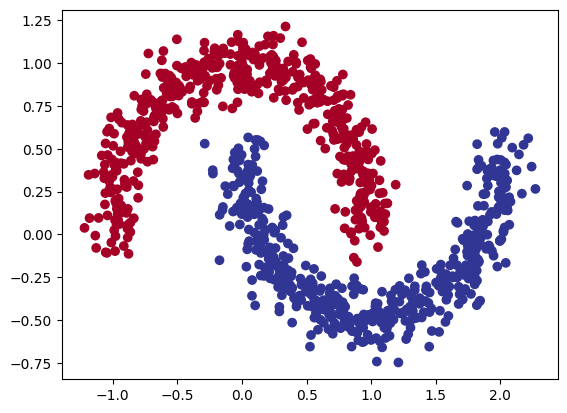

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Creating dataset splits

In [11]:
# Splitting dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Check shape after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

# Creating the model

In [46]:
# Building a simple fully connected model
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fitting the model
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.6196 - accuracy: 0.7325 - val_loss: 0.5885 - val_accuracy: 0.8000
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.8313 - val_loss: 0.5227 - val_accuracy: 0.8350
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.8550 - val_loss: 0.4495 - val_accuracy: 0.8500
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8687 - val_loss: 0.3854 - val_accuracy: 0.8600
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3558 - accuracy: 0.8712 - val_loss: 0.3359 - val_accuracy: 0.8650
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.8750 - val_loss: 0.3022 - val_accuracy: 0.8700
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.8788 - val_loss: 0.2802 - val_accuracy: 0.8750
Epoch 8/50
25/25 [=

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                96        
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________


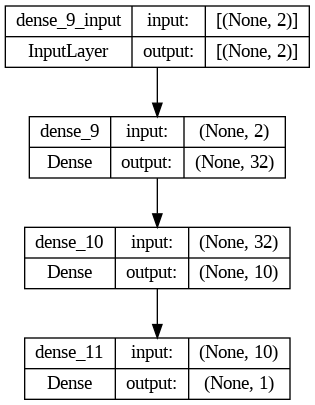

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Plotting the decision boundary

In [13]:
# Creating a function to visualize model performance
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.

  Arguments: 
    model --> the trained model 
    X --> the feature data (numpy array)
    y --> the truth labels 

  Returns:
    A visualization of how our model is performing (fitting with our data)
    
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


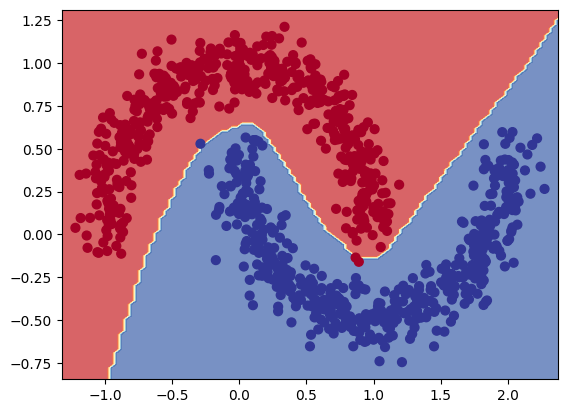

In [47]:
plot_decision_boundary(model, X, y)

Decision boundary plotted on the whole dataset to see how the model discriminates.

# Evaluation

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


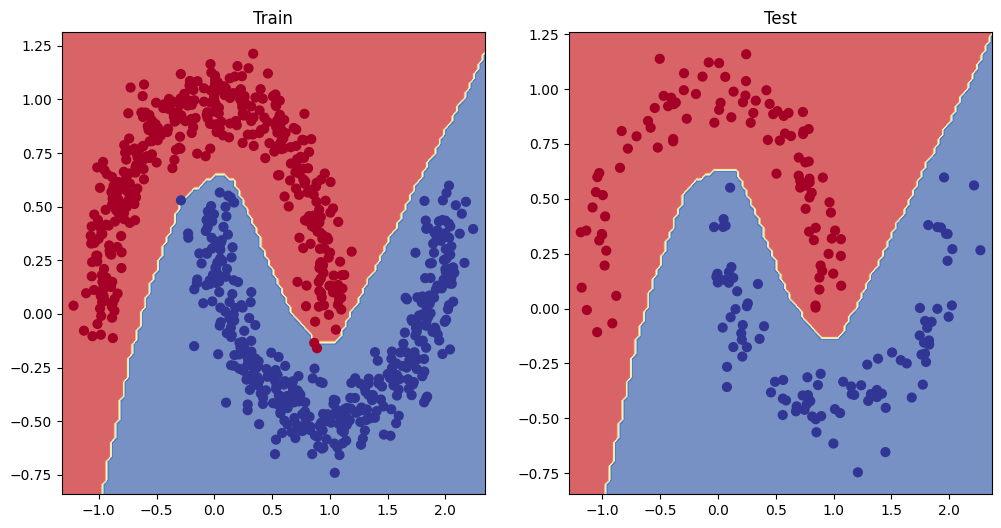

In [49]:
# Decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()

Evident to see the test datset has 100% accuracy with the decision boundary learned.
However there are cases in the training data that lie close to or over the decision boundary, reducing accuracy and increasing loss.

In [50]:
loss_train, accuracy_train = model.evaluate(X_train, y_train)
print(f'Model loss on train set: {loss_train}')
print(f'Model accuracy on train set: {100*accuracy_train:.2f}%')

25/25 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9962
Model loss on train set: 0.019024593755602837
Model accuracy on train set: 99.62%


In [51]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Model loss on test set: {loss_test}')
print(f'Model accuracy on test set: {100*accuracy_test:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 1.0000
Model loss on test set: 0.015453794039785862
Model accuracy on test set: 100.00%


## Loss curves

Text(0.5, 1.0, 'Model Training Curves')

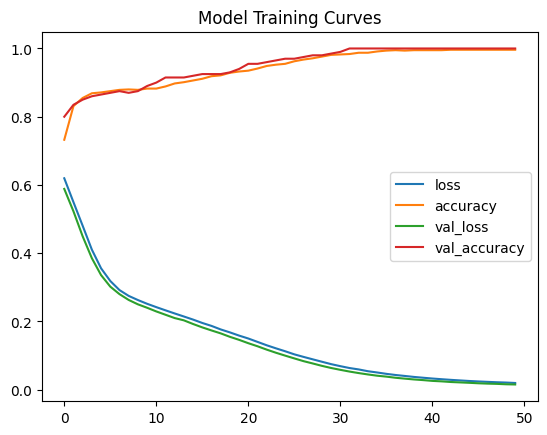

In [52]:
pd.DataFrame(history.history).plot()
plt.title('Model Training Curves')

--2023-06-05 10:44:46--  https://raw.githubusercontent.com/DavAll22/Machine-Learning/main/extra-code/helper_functions_TF.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12745 (12K) [text/plain]
Saving to: ‘helper_functions_TF.py.1’

helper_functions_TF 100%[===================>]  12.45K  --.-KB/s    in 0s      

2023-06-05 10:44:47 (73.2 MB/s) - ‘helper_functions_TF.py.1’ saved [12745/12745]



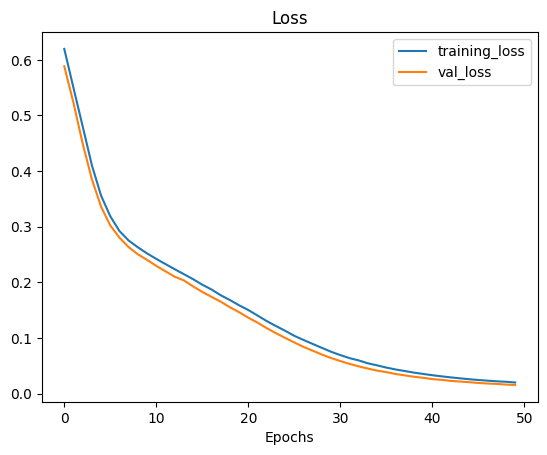

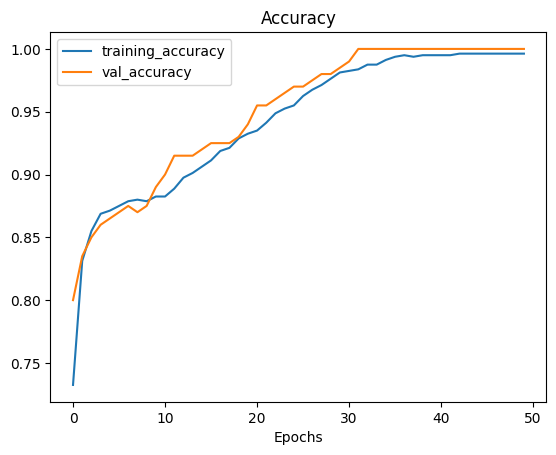

In [53]:
from helper_functions_TF import plot_loss_curves
plot_loss_curves(history)

Learning rate scheduling not necessary since default learning rate of Adam optimiser performs well

# Predictions

In [59]:
# Model predictions
y_probs = model.predict(X_test)
y_probs[:10]

7/7 [==============================] - 0s 2ms/step


array([[9.9671942e-01],
       [2.0680351e-03],
       [9.9069422e-01],
       [5.8071018e-04],
       [9.9911797e-01],
       [9.9928308e-01],
       [3.8712110e-02],
       [1.1808722e-01],
       [9.9913615e-01],
       [4.9720802e-03]], dtype=float32)

In [58]:
# ground truth
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [66]:
# Converting prediction probabilities into binary rounding at boundary 0.5
y_preds = tf.round(y_probs)
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

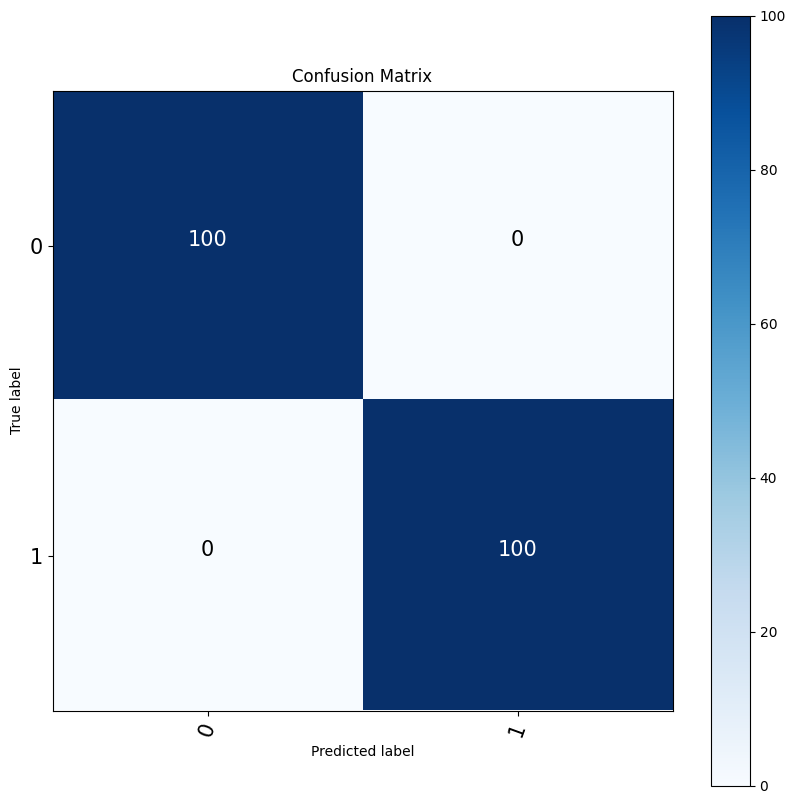

In [67]:
## Confusion matrix
from helper_functions_TF import make_confusion_matrix

make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      )

Model predicts on test set correctly on every case

In [70]:
from sklearn.metrics import classification_report
classification_report_model = classification_report(y_test, y_preds)
print(classification_report_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Data has well-defined group boundaries, hence the nearly 100% accuracy in training.
Increasing the noise to make classifier have a harder time...